<a href="https://colab.research.google.com/github/Suwannaket1/python_dataviz2024/blob/main/HW8_%E0%B8%81%E0%B8%A5%E0%B8%B8%E0%B9%88%E0%B8%A1_MET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# วาด Stacked หรือ Grouped Bar Chart ของข้อมูลหนัง india

## นำเข้าข้อมูล

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/data_viz_2024_DATA'

In [4]:
movie_df = pd.read_csv(os.path.join(path,'IMDb_Movies_India.csv'), encoding='latin-1')
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


##จัดการข้อมูล

In [5]:
movie_df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [6]:
movie_df = movie_df.dropna(subset=['Genre', 'Rating', 'Year'])
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [7]:
#หลัง dropna แล้วข้อมูลเหลือกี่ % จากเดิม

print(f"ข้อมูลเหลือ {(len(movie_df) / len(pd.read_csv(os.path.join(path,'IMDb_Movies_India.csv'), encoding='latin-1'))) * 100:.2f}% จากเดิม")

ข้อมูลเหลือ 50.40% จากเดิม


In [8]:
movie_df['Year'] = movie_df['Year'].astype(str).str.replace('(', '').str.replace(')', '').astype(int)
movie_df

<ipython-input-8-c79b7c519f7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Year'] = movie_df['Year'].astype(str).str.replace('(', '').str.replace(')', '').astype(int)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,1992,NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


## Plot group bar chart ของ หนังอินเดีย โดยแยกกลุ่มตาม Genre และเปรียบเทียบ Rating จาก Year

In [9]:
movie_df = movie_df[['Year', 'Genre', 'Rating']]
movie_df

,Year,Genre,Rating
1,2019,Drama,7.0
3,2019,"Comedy, Romance",4.4
5,1997,"Comedy, Drama, Musical",4.7
6,2005,"Drama, Romance, War",7.4
8,2012,"Horror, Mystery, Thriller",5.6
...,...,...,...
15501,1992,"Action, Crime, Drama",5.3
15503,1989,"Action, Crime, Drama",5.8
15504,1988,Action,4.6
15505,1999,"Action, Drama",4.5


In [10]:
# prompt: มี Genre อะไรบ้าง group ออกมาดูหน่อย ประเภทหนังอะไรที่ซ้ำ ลบออกเลย

# แยก Genre ออกมาเป็น list
all_genres = []
for index, row in movie_df.iterrows():
    genres = row['Genre'].split(',')
    for genre in genres:
        genre = genre.strip()
        if genre not in all_genres:
            all_genres.append(genre)

# แสดงผล Genre ทั้งหมด
all_genres


['Drama',
 'Comedy',
 'Romance',
 'Musical',
 'War',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Crime',
 'History',
 'Family',
 'Adventure',
 'Sci-Fi',
 'Sport',
 'Biography',
 'Fantasy',
 'Documentary',
 'Music',
 'Animation',
 'News',
 'Western']

In [11]:
print(f"มี all_genres ทั้งหมด {len(all_genres)} ประเภท")

มี all_genres ทั้งหมด 22 ประเภท


In [12]:
# สร้าง dictionary เพื่อเก็บจำนวนภาพยนตร์ในแต่ละประเภท
genre_counts = {}
for genre in all_genres:
    genre_counts[genre] = 0

# นับจำนวนภาพยนตร์ในแต่ละประเภท
for index, row in movie_df.iterrows():
    genres = row['Genre'].split(',')
    for genre in genres:
        genre = genre.strip()
        genre_counts[genre] += 1

# เรียงลำดับประเภทหนังตามจำนวนภาพยนตร์จากมากไปน้อย
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# แสดงผล
for genre, count in sorted_genres:
    print(f"{genre}: {count}")


Drama: 4924
Action: 2358
Romance: 1781
Comedy: 1609
Crime: 1111
Thriller: 876
Family: 663
Musical: 498
Adventure: 386
Mystery: 370
Horror: 280
Fantasy: 205
Documentary: 143
Biography: 142
History: 128
Animation: 73
Music: 61
Sport: 51
Sci-Fi: 37
War: 34
Western: 3
News: 2


In [13]:
# Create separate DataFrames for each genre
drama_df = movie_df[movie_df['Genre'] == 'Drama']
action_df = movie_df[movie_df['Genre'] == 'Action']
romance_df = movie_df[movie_df['Genre'] == 'Romance']
comedy_df = movie_df[movie_df['Genre'] == 'Comedy']
crime_df = movie_df[movie_df['Genre'] == 'Crime']

In [14]:
all_table = pd.concat([drama_df,action_df,romance_df,comedy_df, crime_df])
all_table

,Year,Genre,Rating
1,2019,Drama,7.0
10,2004,Drama,6.2
30,2005,Drama,7.1
32,1993,Drama,5.6
36,2004,Drama,4.5
...,...,...,...
13588,2014,Crime,5.9
14142,2014,Crime,5.3
14357,2019,Crime,5.4
14898,2021,Crime,8.9


In [15]:
#ตรวจสอบว่ามีปีอะไรบ้าง
all_table['Year'].unique()

array([2019, 2004, 2005, 1993, 2014, 2008, 1974, 2018, 2016, 2007, 2017,
       2013, 2011, 1982, 2009, 1947, 1977, 1987, 1976, 1985, 1966, 1984,
       1972, 2003, 1968, 1952, 1990, 1986, 1992, 2010, 1965, 1997, 1957,
       1933, 1983, 1989, 1971, 1955, 1973, 1995, 2015, 1936, 1948, 2020,
       1961, 2001, 1954, 2000, 1978, 1991, 2021, 1994, 1940, 1988, 1951,
       1950, 1963, 1938, 1941, 1964, 2012, 1962, 1956, 1960, 1979, 1969,
       2002, 1970, 1932, 1935, 1999, 1937, 1980, 1975, 1959, 1967, 1996,
       2006, 1981, 1953, 1998, 1958, 1944, 1931, 1949, 1943, 1945, 1946,
       1942, 1934])

In [16]:
# prompt: มีปีอะไรบ้าง เรียงปีให้ด้วย แบ่งออกเป็นแถวละ 30,31,31

# เรียงลำดับปี
years = sorted(all_table['Year'].unique())

# แบ่งปีออกเป็นแถวละ 30, 31, 31
rows = []
current_row = []
for year in years:
  current_row.append(year)
  if len(current_row) == 30 or len(current_row) == 31:
    rows.append(current_row)
    current_row = []

if current_row:
  rows.append(current_row)

# แสดงผล
for row in rows:
  print(row)


[1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961]
[1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991]
[1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [17]:
# prompt: แบ่งออกเป็น 3 ช่วง: 1917-1959,  1960-1990, 1991-2021

# Function to categorize years
def categorize_year(year):
  if 1917 <= year <= 1959:
    return '1917-1959'
  elif 1960 <= year <= 1990:
    return '1960-1990'
  elif 1991 <= year <= 2021:
    return '1991-2021'
  else:
    return 'Other'

# Apply the function to create a new column
all_table['Year_Category'] = all_table['Year'].apply(categorize_year)

# Display the DataFrame with the new column
all_table


,Year,Genre,Rating,Year_Category
1,2019,Drama,7.0,1991-2021
10,2004,Drama,6.2,1991-2021
30,2005,Drama,7.1,1991-2021
32,1993,Drama,5.6,1991-2021
36,2004,Drama,4.5,1991-2021
...,...,...,...,...
13588,2014,Crime,5.9,1991-2021
14142,2014,Crime,5.3,1991-2021
14357,2019,Crime,5.4,1991-2021
14898,2021,Crime,8.9,1991-2021


In [18]:
all_table.groupby(['Genre','Year_Category'])['Rating'].mean()

Genre    Year_Category
Action   1917-1959        5.388889
         1960-1990        5.218954
         1991-2021        5.006275
Comedy   1917-1959        6.490000
         1960-1990        6.506667
         1991-2021        5.487255
Crime    1960-1990        5.433333
         1991-2021        4.979310
Drama    1917-1959        6.767188
         1960-1990        6.337562
         1991-2021        6.278980
Romance  1917-1959        6.196154
         1960-1990        6.056790
         1991-2021        5.047244
Name: Rating, dtype: float64

In [19]:
india_bar_data = all_table.groupby(['Genre','Year_Category'])['Rating'].mean().unstack()

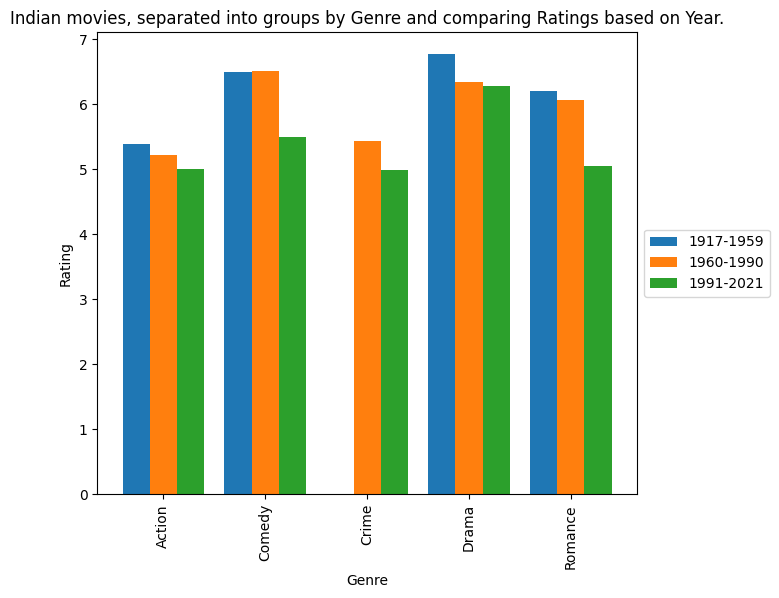

In [20]:
import matplotlib.pyplot as plt

ax = india_bar_data.plot(kind='bar', figsize=(8, 6), width=0.8)

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Indian movies, separated into groups by Genre and comparing Ratings based on Year.')

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the plot size
plt.gcf().subplots_adjust(right=0.8)

# Show the plot
plt.show()

# HW8 วาด Stacked หรือ Grouped Bar Chart ของข้อมูลหนัง india แล้วนำมา Present วันพุธที่ 11 กันยายน 2567

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Data_Viz_2024_Data570-8'

In [ ]:
data_india = pd.read_csv(os.path.join(path,'IMDb Movies India.csv'), encoding='latin-1')
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data_india.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
data_india = data_india.dropna(subset=['Year','Genre'])
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#หลัง dropna แล้วข้อมูลเหลือกี่ % จากเดิม

print(f"ข้อมูลเหลือ {(len(data_india) / len(pd.read_csv(os.path.join(path,'IMDb Movies India.csv'), encoding='latin-1'))) * 100:.2f}% จากเดิม")

ข้อมูลเหลือ 84.72% จากเดิม


In [ ]:
data_india['Year'] = data_india['Year'].str.replace('(', '').str.replace(')', '').astype(int)
data_india

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_india = data_india[['Year','Genre','Name']] # Use square brackets to select columns
data_india

,Year,Genre,Name
1,2019,Drama,#Gadhvi (He thought he was Gandhi)
2,2021,"Drama, Musical",#Homecoming
3,2019,"Comedy, Romance",#Yaaram
4,2010,Drama,...And Once Again
5,1997,"Comedy, Drama, Musical",...Aur Pyaar Ho Gaya
...,...,...,...
15504,1988,Action,Zulm Ko Jala Doonga
15505,1999,"Action, Drama",Zulmi
15506,2005,Action,Zulmi Raj
15507,1988,Action,Zulmi Shikari


In [ ]:
# แยก Genre ออกมาเป็น list
all_genres = []
for index, row in data_india.iterrows():
    if isinstance(row['Genre'], str): # Check if the genre value is a string
        genres = row['Genre'].split(',')
        for genre in genres:
            genre = genre.strip()
            if genre not in all_genres:
                all_genres.append(genre)

# แสดงผล Genre ทั้งหมด
all_genres


['Drama',
 'Musical',
 'Comedy',
 'Romance',
 'War',
 'Documentary',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Crime',
 'Fantasy',
 'Family',
 'History',
 'Adventure',
 'Sci-Fi',
 'Sport',
 'Biography',
 'Music',
 'Animation',
 'News',
 'Western',
 'Reality-TV',
 'Short']

In [ ]:
print(f"มี all_genres ทั้งหมด {len(all_genres)} ประเภท")

มี all_genres ทั้งหมด 24 ประเภท


In [ ]:
# สร้าง dictionary เพื่อเก็บจำนวนภาพยนตร์ในแต่ละประเภท
genre_counts = {}
for genre in all_genres:
    genre_counts[genre] = 0

# นับจำนวนภาพยนตร์ในแต่ละประเภท
for index, row in data_india.iterrows():
    if isinstance(row['Genre'], str): # Check if the genre value is a string
        genres = row['Genre'].split(',')
        for genre in genres:
            genre = genre.strip()
            if genre in genre_counts: # Check if the genre exists in the dictionary
                genre_counts[genre] += 1

# เรียงลำดับประเภทหนังตามจำนวนภาพยนตร์จากมากไปน้อย
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# แสดงผล
for genre, count in sorted_genres:
    print(f"{genre}: {count}")

Drama: 7034
Action: 3479
Romance: 2401
Comedy: 1950
Thriller: 1621
Crime: 1287
Family: 928
Musical: 578
Adventure: 518
Mystery: 492
Horror: 488
Fantasy: 444
Documentary: 370
History: 197
Biography: 194
Animation: 119
Music: 85
Sport: 66
Sci-Fi: 53
War: 42
News: 9
Western: 4
Reality-TV: 3
Short: 1


In [ ]:
# Create separate DataFrames for each genre
drama_df = data_india[data_india['Genre'] == 'Drama']
action_df = data_india[data_india['Genre'] == 'Action']
romance_df = data_india[data_india['Genre'] == 'Romance']
comedy_df = data_india[data_india['Genre'] == 'Comedy']
thriller_df = data_india[data_india['Genre'] == 'Thriller']

In [ ]:
all_table = pd.concat([drama_df,action_df,romance_df,comedy_df, thriller_df])
all_table

,Year,Genre,Name
1,2019,Drama,#Gadhvi (He thought he was Gandhi)
4,2010,Drama,...And Once Again
10,2004,Drama,1:1.6 An Ode to Lost Love
27,2020,Drama,13 Tribute of Love
30,2005,Drama,15 Park Avenue
...,...,...,...
15278,2002,Thriller,Yeh Raat Honeymoon Ki
15295,2005,Thriller,Yehi Hai High Society
15307,2017,Thriller,You Make Me Feel Alive
15349,1991,Thriller,Zakhmi Haseena


In [ ]:
all_table['Year'].unique()

array([2019, 2010, 2004, 2020, 2005, 1993, 2014, 2018, 1956, 2008, 1974,
       2016, 2007, 2017, 1959, 2013, 1970, 2021, 2011, 1983, 1982, 1996,
       1957, 2009, 1947, 1992, 1977, 1987, 1976, 1991, 1979, 1940, 1968,
       2000, 1985, 1966, 1988, 2001, 1984, 1972, 2003, 1948, 1952, 1990,
       1978, 1953, 1986, 1965, 1997, 1999, 1980, 1989, 1933, 1939, 1971,
       1995, 2015, 1955, 1973, 1960, 1975, 1981, 1936, 1967, 1961, 1949,
       1941, 1937, 2002, 1954, 1964, 1994, 2012, 1951, 1950, 1963, 1945,
       1938, 1962, 1969, 2006, 1943, 1932, 1935, 1946, 1958, 1998, 1942,
       1944, 1931, 1934, 2022])

In [ ]:
# prompt: มีทั้งหมดกี่ปี

# Find the number of unique years
num_years = len(all_table['Year'].unique())
print(f"มีทั้งหมด {num_years} ปี")


มีทั้งหมด 92 ปี


In [ ]:
# prompt: แบ่งปีออกเป็น 3 ช่วง

# Function to categorize years
def categorize_year(year):
  if 1917 <= year <= 1959:
    return '1917-1959'
  elif 1960 <= year <= 1990:
    return '1960-1990'
  elif 1991 <= year <= 2022:
    return '1991-2022'
  else:
    return 'Other'

# Apply the function to create a new column
all_table['Year_Category'] = all_table['Year'].apply(categorize_year)

# Display the DataFrame with the new column
all_table


,Year,Genre,Name,Year_Category
1,2019,Drama,#Gadhvi (He thought he was Gandhi),1991-2022
4,2010,Drama,...And Once Again,1991-2022
10,2004,Drama,1:1.6 An Ode to Lost Love,1991-2022
27,2020,Drama,13 Tribute of Love,1991-2022
30,2005,Drama,15 Park Avenue,1991-2022
...,...,...,...,...
15278,2002,Thriller,Yeh Raat Honeymoon Ki,1991-2022
15295,2005,Thriller,Yehi Hai High Society,1991-2022
15307,2017,Thriller,You Make Me Feel Alive,1991-2022
15349,1991,Thriller,Zakhmi Haseena,1991-2022


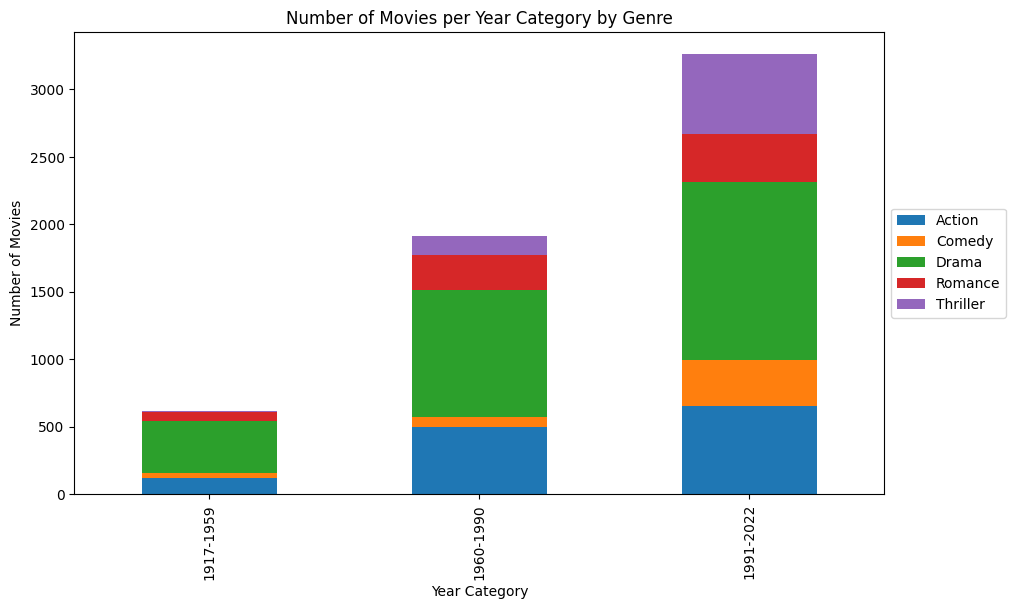

In [ ]:
# prompt: plot stacked bar chart นับจำนวนหนังแต่ละประเภท ตามช่วงปี

import matplotlib.pyplot as plt
# Group the data by Year_Category and Genre, then count the number of movies in each group
# Use the 'all_table' DataFrame instead of 'data_india'
movie_counts = all_table.groupby(['Year_Category', 'Genre'])['Name'].count().unstack()

# Create the stacked bar chart
movie_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add labels and title
plt.xlabel('Year Category')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Year Category by Genre')

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the plot size
plt.gcf().subplots_adjust(right=0.8)

# Show the plot
plt.show()

In [ ]:
movie_counts = all_table.groupby(['Year_Category', 'Genre'])['Name'].count().unstack()

In [ ]:
movie_counts['Action'].values

array([117, 495, 653])

In [ ]:
movie_counts.index

Index(['1917-1959', '1960-1990', '1991-2022'], dtype='object', name='Year_Category')

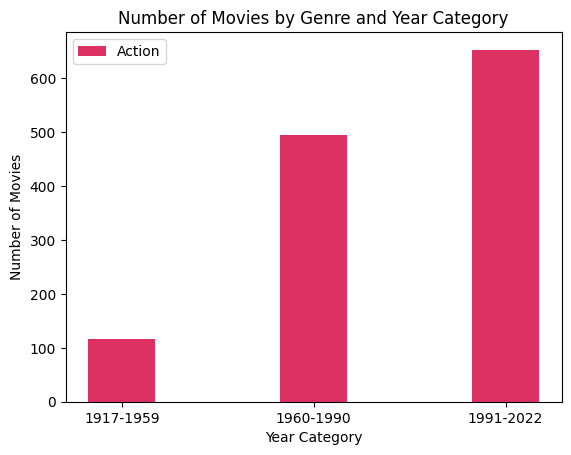

In [ ]:
import matplotlib.pyplot as plt #stack คือเอามาซ้อนกัน

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(movie_counts.index,movie_counts['Action'].values, width, label='Action',color = '#DE3163')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

plt.xlabel('Year Category')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre and Year Category')
ax.legend()

plt.show()

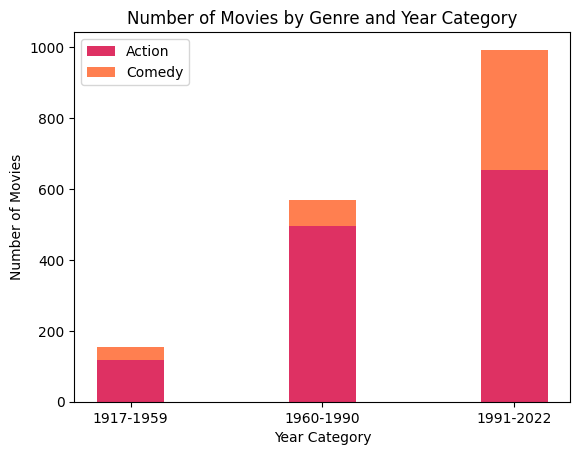

In [ ]:
import matplotlib.pyplot as plt #stack คือเอามาซ้อนกัน

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(movie_counts.index,movie_counts['Action'].values, width, label='Action',color = '#DE3163')
ax.bar(movie_counts.index,movie_counts['Comedy'].values, width, bottom=movie_counts['Action'].values, label='Comedy',color = '#FF7F50')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

plt.xlabel('Year Category')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre and Year Category')
ax.legend()

plt.show()

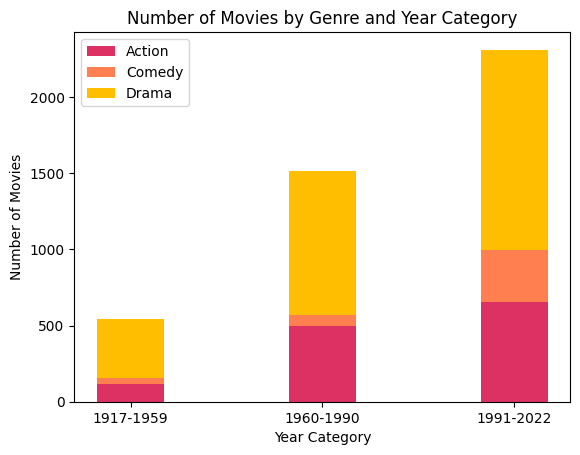

In [ ]:
import matplotlib.pyplot as plt #stack คือเอามาซ้อนกัน

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(movie_counts.index,movie_counts['Action'].values, width, label='Action',color = '#DE3163')
ax.bar(movie_counts.index,movie_counts['Comedy'].values, width, bottom=movie_counts['Action'].values, label='Comedy',color = '#FF7F50')
ax.bar(movie_counts.index,movie_counts['Drama'].values, width,
          bottom=movie_counts['Action']+movie_counts['Comedy'].values, label='Drama',color = '#FFBF00')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

plt.xlabel('Year Category')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre and Year Category')
ax.legend()

plt.show()

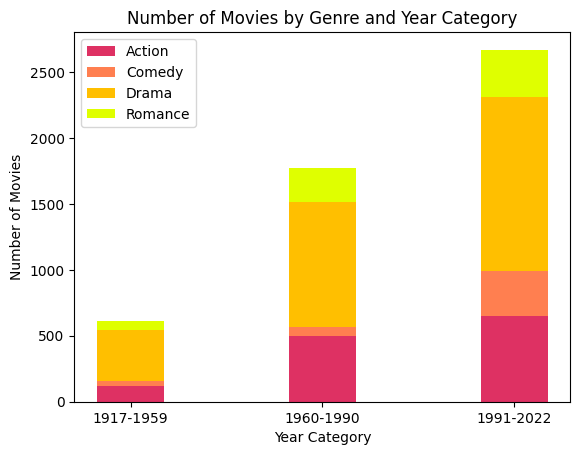

In [ ]:
import matplotlib.pyplot as plt #stack คือเอามาซ้อนกัน

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(movie_counts.index,movie_counts['Action'].values, width, label='Action',color = '#DE3163')
ax.bar(movie_counts.index,movie_counts['Comedy'].values, width, bottom=movie_counts['Action'].values, label='Comedy',color = '#FF7F50')
ax.bar(movie_counts.index,movie_counts['Drama'].values, width,
          bottom=movie_counts['Action']+movie_counts['Comedy'].values, label='Drama',color = '#FFBF00')
ax.bar(movie_counts.index,movie_counts['Romance'].values, width,
          bottom=movie_counts['Action']+movie_counts['Comedy']+movie_counts['Drama'].values, label='Romance',color = '#DFFF00')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

plt.xlabel('Year Category')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre and Year Category')
ax.legend()

plt.show()

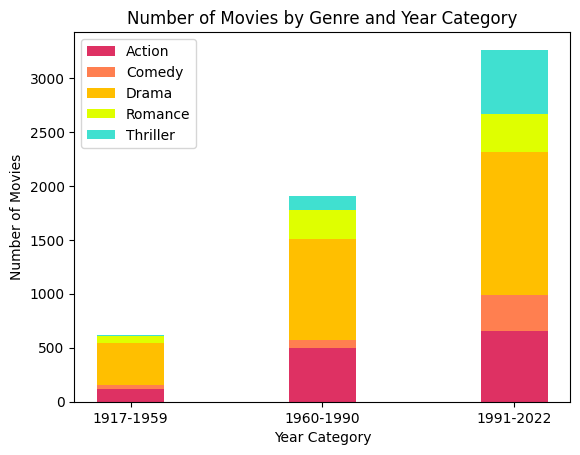

In [ ]:
import matplotlib.pyplot as plt #stack คือเอามาซ้อนกัน

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(movie_counts.index,movie_counts['Action'].values, width, label='Action',color = '#DE3163')
ax.bar(movie_counts.index,movie_counts['Comedy'].values, width,
          bottom=movie_counts['Action'].values, label='Comedy',color = '#FF7F50')
ax.bar(movie_counts.index,movie_counts['Drama'].values, width,
          bottom=movie_counts['Action']+movie_counts['Comedy'].values, label='Drama',color = '#FFBF00')
ax.bar(movie_counts.index,movie_counts['Romance'].values, width,
          bottom=movie_counts['Action']+movie_counts['Comedy']+movie_counts['Drama'].values, label='Romance',color = '#DFFF00')
ax.bar(movie_counts.index,movie_counts['Thriller'].values, width,
          bottom=movie_counts['Action']+movie_counts['Comedy']+movie_counts['Drama']+movie_counts['Romance'].values, label='Thriller',color = '#40E0D0')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

plt.xlabel('Year Category')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre and Year Category')
ax.legend()

plt.show()